<b>Task N1 :<b> 

#  Los Angeles city Payroll project

<div class="alert alert-block alert-info">
<b>Link:</b> https://controllerdata.lacity.org/Payroll/City-Employee-Payroll-Current-/g9h8-fvhu 
    
* <b>Context:</b>
The City of Los Angeles is committed to ensuring efficient use of its resources and maintaining a transparent and fair payroll system for all employees. However, recent budget constraints have prompted the city to reevaluate its payroll distribution and identify areas for improvement.
* <b>Project or Task:</b> To conduct a clustering analysis on the payroll dataset, grouping employees based on attributes such as pay, job classification, and department. The objective is to uncover hidden patterns in the data that can inform strategic decisions related to workforce management and budget optimization along with the reasonable distribution of payroll among employees.
* <b>Experiment Plan:</b> Identify relevant features for clustering, Choose appropriate clustering algorithms based on the nature of the dataset and the desired outcomes.
* <b>Expected Value for the Organization:</b>
        Organization expects the following: Distribution insight, meaning gaining a nuanced understanding of the distribution of payroll among employees by identifying distinct clusters with similar compensation patterns. Resource  Tailored Strategies: Develop tailored HR strategies for each cluster, addressing specific needs and concerns.


<b>Task N2 :<b>


    
<b>Dataset:</b>
Payroll information for all Los Angeles City Employees including the City's three proprietary departments: Water and Power, Airports and Harbor. Data is updated bi-weekly by the Los Angeles City Controller's Office. Payroll information for employees of the Department of Water and Power is updated every three months.

<b>Suitability </b>:
 The dataset, encompassing payroll information for all Los Angeles City employees, including proprietary departments, provides a rich source of detailed attributes such as employee names, job classifications, employment types, gender, ethnicity, and various components of pay, facilitating a comprehensive analysis for tasks such as identifying disparities in regular pay, overtime pay, benefits, and city retirement contributions, thereby laying a robust foundation for subsequent clustering experiments to uncover nuanced patterns in the distribution of payroll among employees based on job titles, departments, and other key factors.


<b>Important Libraries:</b> 


In [ ]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, OPTICS, cluster_optics_dbscan

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer



<b>Dataset:</b> 

In [21]:
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

df = pd.read_csv('City_Employee_Payroll__Current__20231105.csv')

<div class="alert alert-block alert-success">
<b>IDA:</b> 

<b>Data Exploration:</b> The plots provide a clear and intuitive representation of the distribution of numerical data. Central tendencies are as follows: Overtime Pay and all other pay are characterized with low variability, while Regular and Benefit pay looks more divesrly spread.

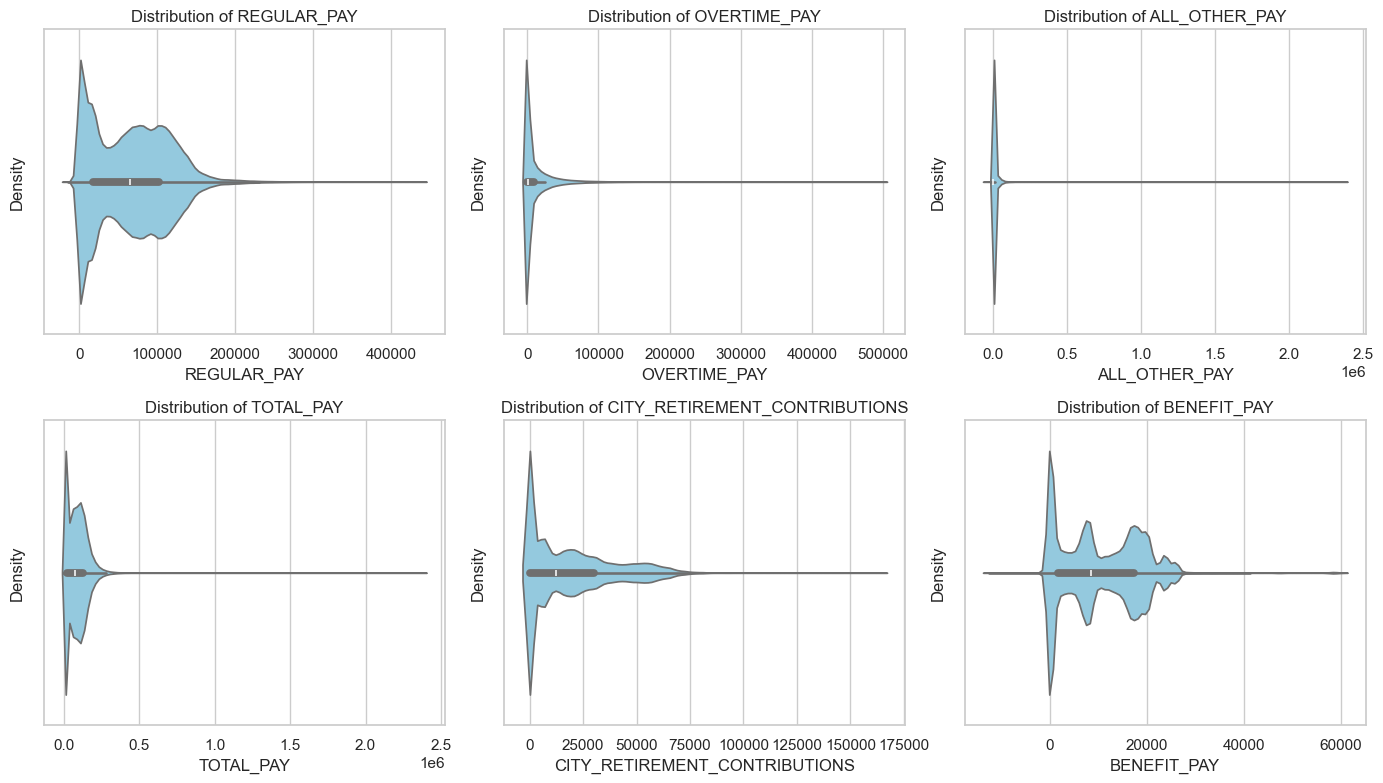

In [22]:
warnings.simplefilter(action='ignore')

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
for i, column in enumerate(['REGULAR_PAY', 'OVERTIME_PAY', 'ALL_OTHER_PAY', 'TOTAL_PAY', 'CITY_RETIREMENT_CONTRIBUTIONS', 'BENEFIT_PAY'], 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=df[column], color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


<b>Outlier Analysis:</b> The examination of the box plots reveals pronounced outliers in all numerical features, with particular emphasis on overtime pay and city retirement contributions.

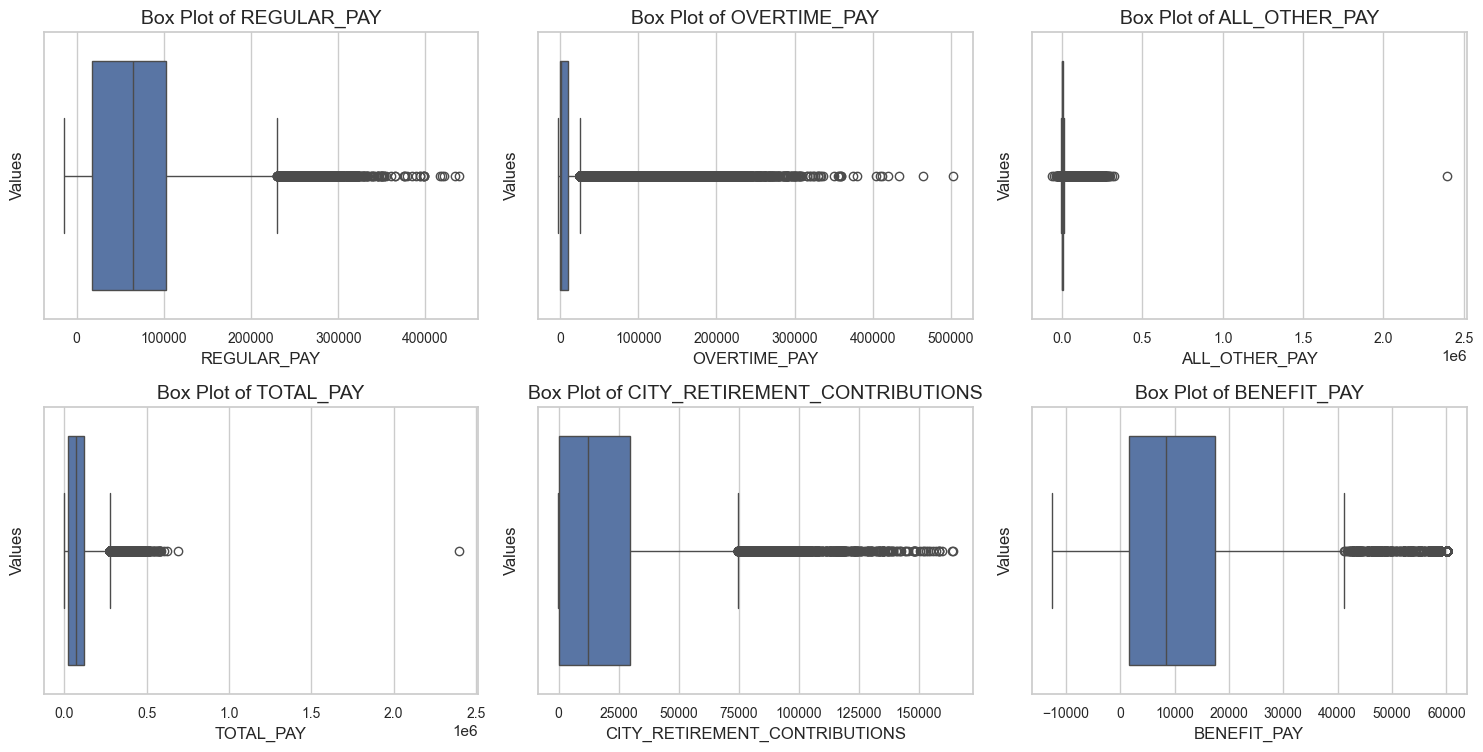

In [23]:

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, column in enumerate(['REGULAR_PAY', 'OVERTIME_PAY', 'ALL_OTHER_PAY', 'TOTAL_PAY', 'CITY_RETIREMENT_CONTRIBUTIONS', 'BENEFIT_PAY']):
    row_index, col_index = divmod(i, 3)
    sns.boxplot(x=df[column], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Box Plot of {column}', fontsize=14)
    axes[row_index, col_index].set_xlabel(column, fontsize=12)
    axes[row_index, col_index].set_ylabel('Values', fontsize=12)
    axes[row_index, col_index].tick_params(labelsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<b>Basic statistics:</b>

In [24]:
df.describe().round(2)

,PAY_YEAR,DEPARTMENT_NO,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY
count,497865.00,497865.00,497865.00,497865.00,497865.00,497865.00,497865.00,497865.00
mean,2019.91,65.69,65025.62,10216.69,5232.72,80475.02,18503.27,10210.58
std,1.99,29.49,49238.07,22374.23,12139.31,64754.32,20015.25,8469.76
min,2017.00,2.00,-14952.00,-3527.16,-63461.98,-4042.00,-425.02,-12592.45
25%,2018.00,42.00,17610.54,0.00,200.00,20333.51,0.00,1544.00
50%,2020.00,70.00,64768.22,565.13,1713.05,74735.74,12158.70,8489.52
75%,2022.00,88.00,102630.40,9908.54,5629.78,122533.57,29946.09,17400.00
max,2023.00,98.00,438025.36,502680.87,2394972.00,2394972.00,164256.85,60097.97


<b>Anomaly Detection:</b> Assessing anomalies by counting instances of negative values in the numerical columns (detected on the above statistical features table), which represent monetary amounts.

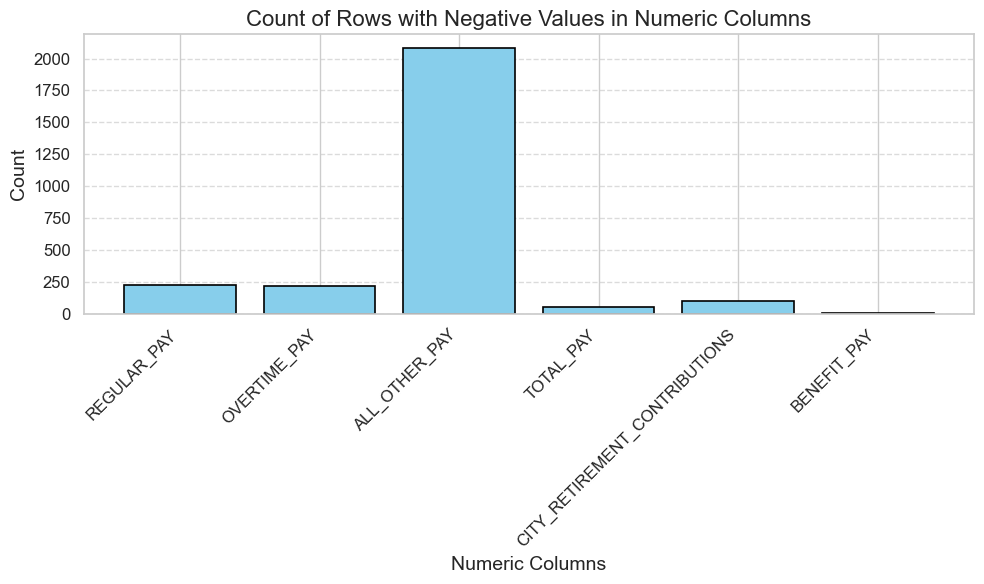

In [25]:

numeric_columns = ['REGULAR_PAY', 'OVERTIME_PAY', 'ALL_OTHER_PAY', 'TOTAL_PAY', 'CITY_RETIREMENT_CONTRIBUTIONS', 'BENEFIT_PAY']

negative_values_counts = pd.DataFrame(columns=['Column', 'Count'])

for column in numeric_columns:
    below_zero_values = df[df[column] < 0]
    negative_values_counts = pd.concat([negative_values_counts, pd.DataFrame({'Column': [column], 'Count': [len(below_zero_values)]})], ignore_index=True)

plt.figure(figsize=(10, 6))
plt.bar(negative_values_counts['Column'], negative_values_counts['Count'], color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Count of Rows with Negative Values in Numeric Columns', fontsize=16)
plt.xlabel('Numeric Columns', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>EDA:</b> 

Given the adjustments made in budgeting during the preceding accounting year, 2022, our focus is solely on the most recent year, 2023. Consequently, the company has the opportunity to implement essential policies before the conclusion of the financial year 2023. Moreover, negative values have been excluded from the dataset as they deviate from the expected norm. Furthermore, to address concerns primarily associated with currently active full-time employees, the dataset has been filtered accordingly. The "Gender" column has been transformed into a numerical format, guided by the assumption that it may exert an influence on the overall distribution of the payroll.

In [ ]:
df_filtered = df[
    (df['TOTAL_PAY'] > 0) &
    (df['REGULAR_PAY'] >= 0) &
    (df['OVERTIME_PAY'] >= 0) &
    (df['ALL_OTHER_PAY'] >= 0) &
    (df['CITY_RETIREMENT_CONTRIBUTIONS'] >= 0) &
    ((df['GENDER'] =="FEMALE") | (df['GENDER'] =="MALE")) &
    (df['EMPLOYMENT_TYPE'] =="FULL_TIME") &
    (df['JOB_STATUS'] =="ACTIVE") &
    (df['PAY_YEAR'] ==2023) &
    (df['ETHNICITY'] !="NA") & (df['ETHNICITY'] !="OTHER") & (df['ETHNICITY'] !="UNKNOWN")  & (df['ETHNICITY'] !="NOT APPLICABLE")  
]
df =df_filtered.drop(columns=['RECORD_NBR',  'LAST_NAME', 'FIRST_NAME', 'DEPARTMENT_NO',
       'DEPARTMENT_TITLE', 'JOB_CLASS_PGRADE', 'JOB_TITLE', 'EMPLOYMENT_TYPE',
       'JOB_STATUS', 'MOU', 'MOU_TITLE','PAY_YEAR'])

df = df.dropna(subset=['ETHNICITY'])

label_encoder = LabelEncoder()

if 'GENDER' in df.columns:
    df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

df.reset_index()
df.set_index('ETHNICITY', inplace=True)
df

,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER
ETHNICITY,,,,,,,
HISPANIC,15278.40,0.00,2470.60,17749.00,1008.00,6446.61,0
ASIAN AMERICAN,42981.60,1634.06,21235.44,65851.10,2837.00,2349.48,0
BLACK,75350.40,0.00,20165.63,95516.03,4973.00,4507.68,1
ASIAN AMERICAN,30376.93,6884.35,7044.72,44306.00,2005.00,6446.61,1
HISPANIC,28541.94,0.00,5937.55,34479.49,1884.00,6446.61,1
...,...,...,...,...,...,...,...
HISPANIC,45376.00,0.00,3121.56,48497.56,13458.52,6871.14,0
CAUCASIAN,117483.20,0.00,20139.63,137622.83,34845.52,14545.08,0
HISPANIC,90518.14,799.30,6745.00,98062.44,42407.75,15111.47,0


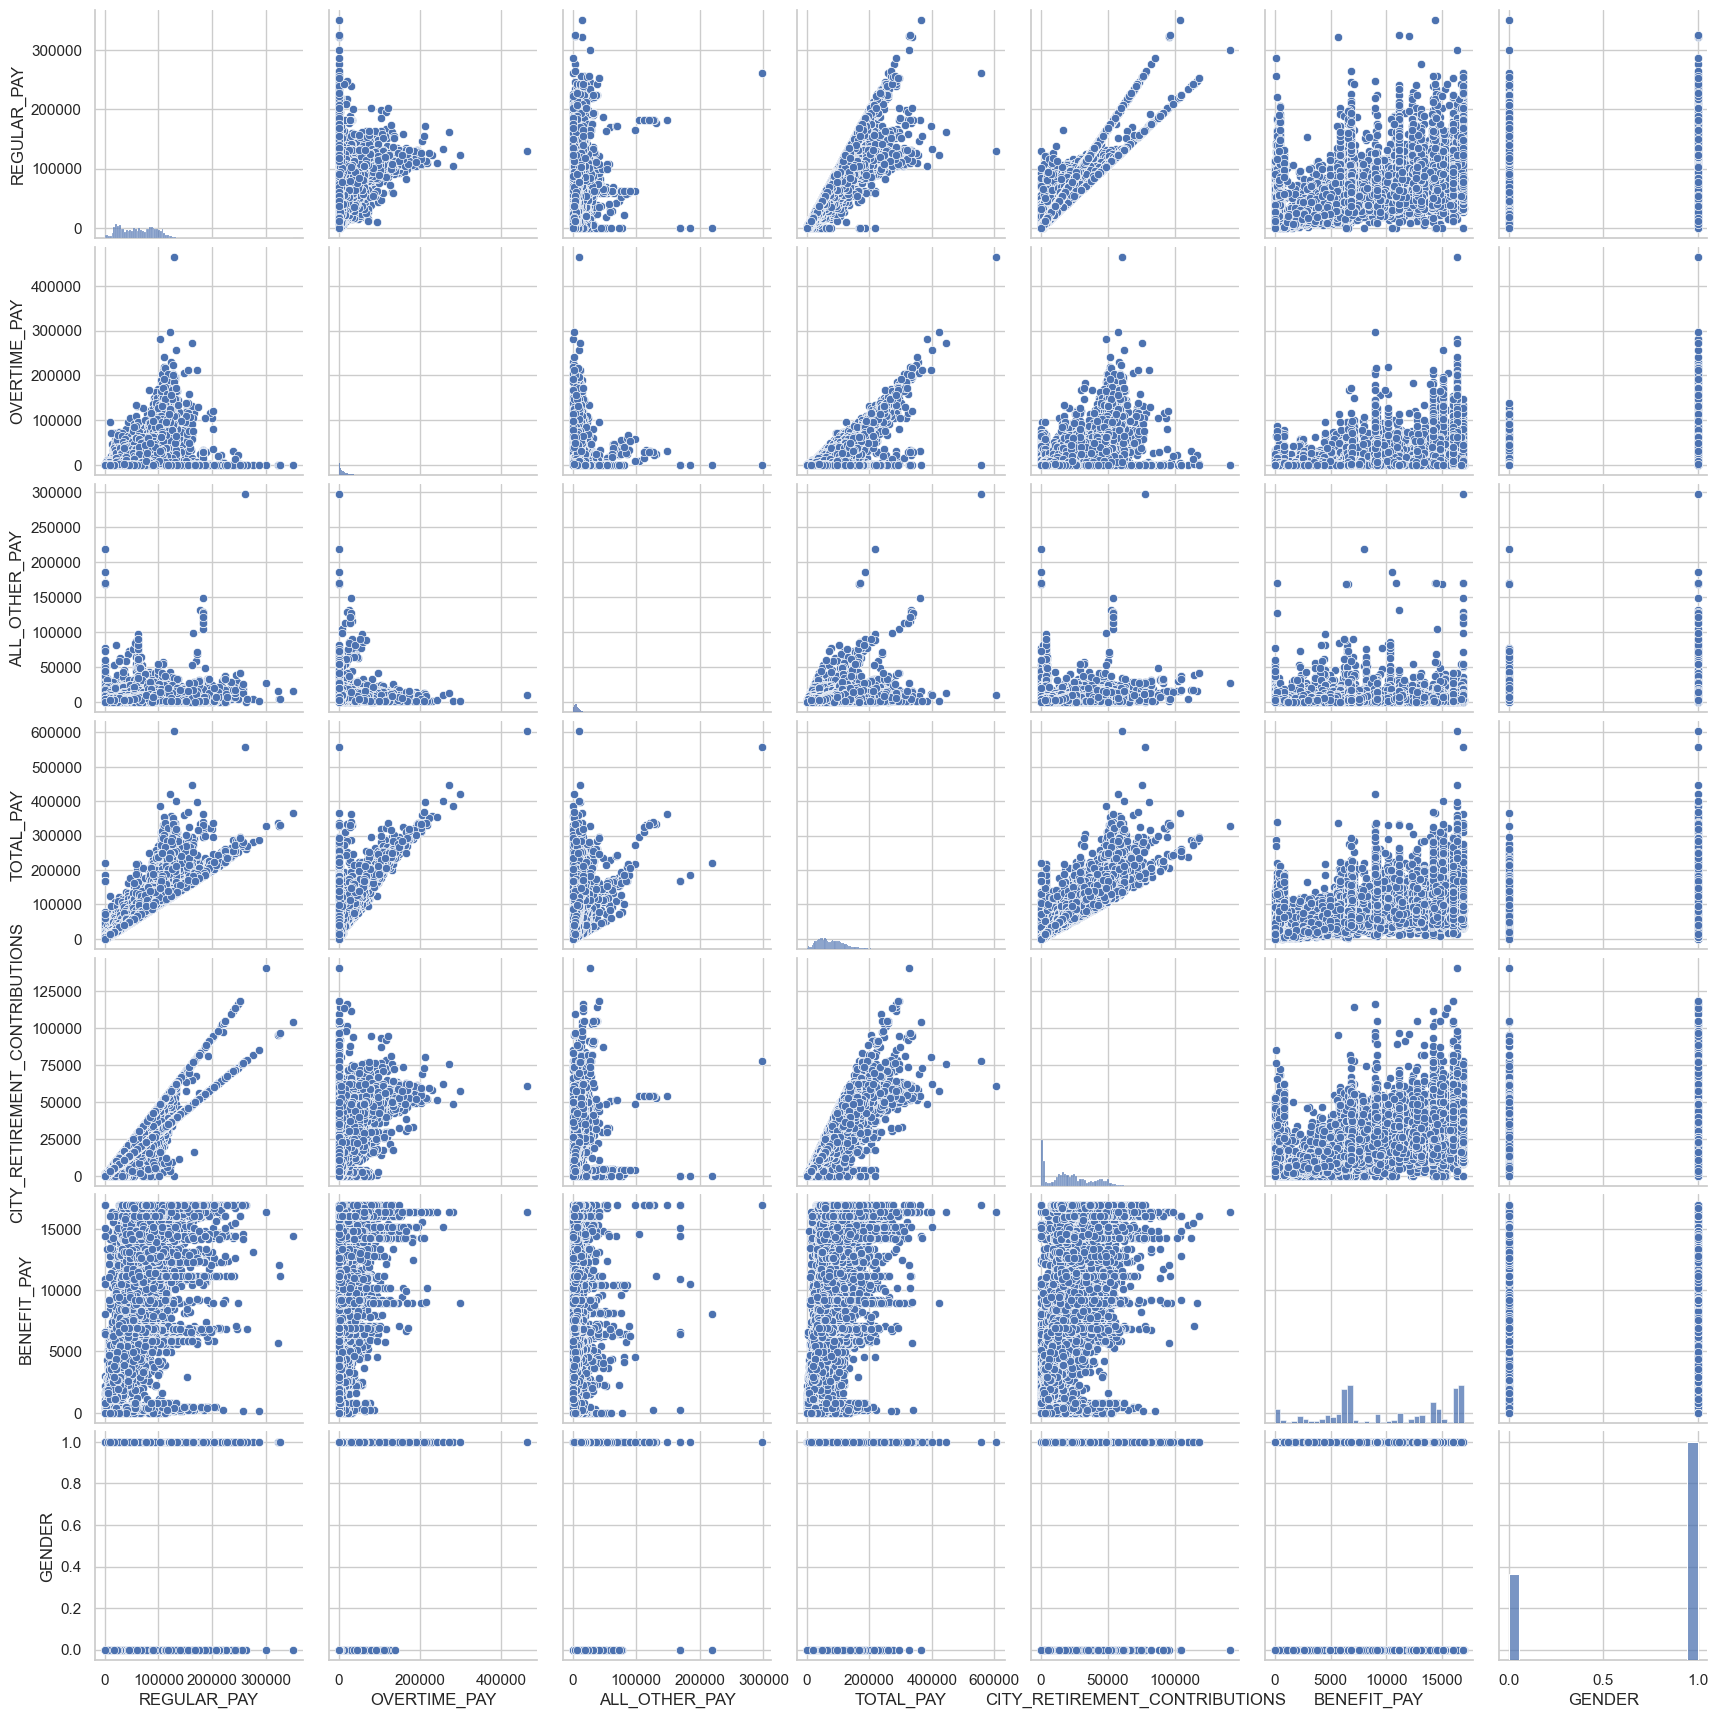

In [27]:
sns.pairplot(df)
plt.show()

The aforementioned chart illustrates dependencies between individual features, and while many of the plots may appear counterintuitive, a discernible pattern emerges, affirming that, across various criteria, men consistently receive higher compensation.

In [28]:
df.describe().round(2)

,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER
count,43154.00,43154.00,43154.00,43154.00,43154.00,43154.00,43154.00
mean,64355.75,11313.77,6056.95,81726.48,21455.82,10044.16,0.72
std,35955.12,20596.98,6560.58,47039.17,17038.08,5283.53,0.45
min,0.00,0.00,0.00,14.25,0.00,0.00,0.00
25%,32493.74,0.00,2535.93,46071.10,4603.64,6446.61,0.00
50%,63182.47,2887.01,5214.00,75450.95,19165.14,9256.35,1.00
75%,90471.85,13573.98,7882.72,108510.52,32816.07,15267.32,1.00
max,350383.14,464614.75,297051.33,603847.66,140626.49,16941.19,1.00


<div class="alert alert-block alert-warning">
After conducting Exploratory Data Analysis, some alterations have been observed in certain statistical features, notably the standard deviation. While the mean values have remained relatively consistent, there is a discernible decrease in standard deviation across several instances. This reduction has resulted in a higher density of data points within the working sample.

<div class="alert alert-block alert-success">
<b>PCA:</b> 

In [29]:
# As the data contains of diiferent types of features, scaling is conducted:
scaler = StandardScaler()  
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'int32'])
index = numeric_cols.index

df_sc = scaler.fit_transform(numeric_cols)
df_sc = pd.DataFrame(df_sc, index=index, columns=numeric_cols.columns).round(2)

df_sc

,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER
ETHNICITY,,,,,,,
HISPANIC,-1.36,-0.55,-0.55,-1.36,-1.20,-0.68,-1.59
ASIAN AMERICAN,-0.59,-0.47,2.31,-0.34,-1.09,-1.46,-1.59
BLACK,0.31,-0.55,2.15,0.29,-0.97,-1.05,0.63
ASIAN AMERICAN,-0.95,-0.22,0.15,-0.80,-1.14,-0.68,0.63
HISPANIC,-1.00,-0.55,-0.02,-1.00,-1.15,-0.68,0.63
...,...,...,...,...,...,...,...
HISPANIC,-0.53,-0.55,-0.45,-0.71,-0.47,-0.60,-1.59
CAUCASIAN,1.48,-0.55,2.15,1.19,0.79,0.85,-1.59
HISPANIC,0.73,-0.51,0.10,0.35,1.23,0.96,-1.59


In [30]:
df_sc.cov().round(2)

,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER
REGULAR_PAY,1.00,0.28,0.05,0.90,0.92,0.61,0.05
OVERTIME_PAY,0.28,1.00,0.03,0.66,0.41,0.26,0.23
ALL_OTHER_PAY,0.05,0.03,1.00,0.19,-0.04,-0.02,0.12
TOTAL_PAY,0.90,0.66,0.19,1.00,0.87,0.58,0.16
CITY_RETIREMENT_CONTRIBUTIONS,0.92,0.41,-0.04,0.87,1.00,0.60,0.09
BENEFIT_PAY,0.61,0.26,-0.02,0.58,0.60,1.00,0.12
GENDER,0.05,0.23,0.12,0.16,0.09,0.12,1.00


High covariance is observed between certain features, exemplified by Total Pay and Regular Pay where one feature encompasses the other, as well as Regular pay and retirement contributions, contributing to the heightened covariance.


In [31]:
pca = PCA()
pca.fit(df_sc) 
pca_transformed = pca.transform(df_sc)
df_pca = pd.DataFrame(data=pca_transformed, columns=[f"PC_{i+1}" for i in range(pca_transformed.shape[1])], index=df_sc.index)
df_pca


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
ETHNICITY,,,,,,,
HISPANIC,-2.580524,-1.075705,0.189183,0.749928,-0.562402,0.103137,-0.002212
ASIAN AMERICAN,-1.763240,0.699907,2.615991,1.180022,0.129681,-0.153160,-0.004182
BLACK,-0.579714,1.828965,1.640545,-0.230266,0.717919,-0.775948,-0.004712
ASIAN AMERICAN,-1.686305,0.866320,-0.351116,-0.140312,-0.035542,-0.178765,0.001081
HISPANIC,-1.930113,0.653161,-0.390260,-0.401125,0.024066,-0.129881,0.005887
...,...,...,...,...,...,...,...
HISPANIC,-1.449643,-1.271452,0.481930,0.668046,-0.062286,0.072021,-0.001019
CAUCASIAN,1.801886,-0.400095,2.982931,0.031631,-0.261938,-0.189907,-0.000315
HISPANIC,1.178067,-1.638015,1.189833,-0.042348,-0.339609,0.537826,0.001093


In [32]:
df_pca.cov().round(2)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
PC_1,3.56,-0.00,0.00,-0.00,0.00,-0.00,-0.0
PC_2,-0.00,1.17,-0.00,0.00,-0.00,0.00,0.0
PC_3,0.00,-0.00,0.94,0.00,0.00,-0.00,-0.0
PC_4,-0.00,0.00,0.00,0.76,-0.00,0.00,0.0
PC_5,0.00,-0.00,0.00,-0.00,0.49,-0.00,-0.0
PC_6,-0.00,0.00,-0.00,0.00,-0.00,0.08,0.0
PC_7,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.0


[5.08691276e-01 1.66859530e-01 1.34928987e-01 1.07963011e-01
 6.97955700e-02 1.17604857e-02 1.14009007e-06]


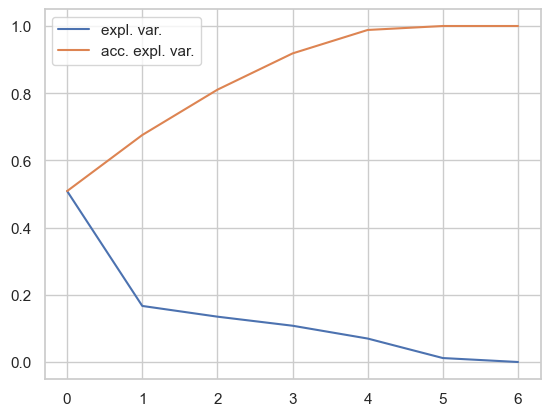

In [33]:
expl_var=pca.explained_variance_ratio_
print(expl_var)
plt.plot(expl_var, label='expl. var.')
plt.plot(np.add.accumulate(expl_var), label='acc. expl. var.')
plt.legend()

Loadings:
                                   PC_1      PC_2      PC_3      PC_4  \
REGULAR_PAY                    0.484363 -0.193490  0.177199 -0.155884   
OVERTIME_PAY                   0.313765  0.323739 -0.357902  0.703895   
ALL_OTHER_PAY                  0.048543  0.601621  0.770272 -0.004679   
TOTAL_PAY                      0.514380  0.077773  0.086180  0.188432   
CITY_RETIREMENT_CONTRIBUTIONS  0.491856 -0.183113  0.020925 -0.056935   
BENEFIT_PAY                    0.382542 -0.152407 -0.033093 -0.411867   
GENDER                         0.108353  0.658027 -0.488086 -0.521371   

                                   PC_5      PC_6          PC_7  
REGULAR_PAY                    0.330411 -0.487405 -5.705434e-01  
OVERTIME_PAY                  -0.254909  0.037757 -3.267711e-01  
ALL_OTHER_PAY                 -0.117458  0.133143 -1.040722e-01  
TOTAL_PAY                      0.124619 -0.337685  7.462371e-01  
CITY_RETIREMENT_CONTRIBUTIONS  0.303551  0.792922  1.276396e-04  
BENEFIT_P

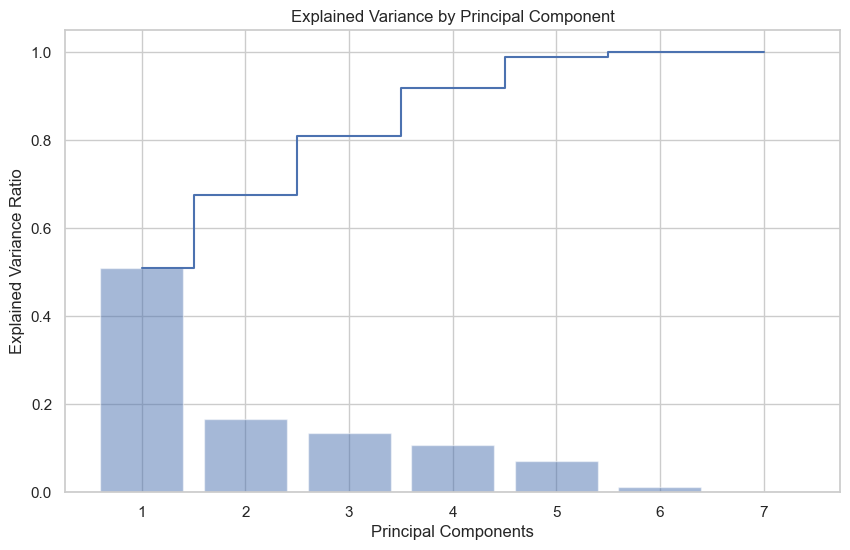

In [ ]:
pca = PCA()
df_pca = pca.fit_transform(df_sc)
components = pca.components_
loadings_df = pd.DataFrame(components.T, columns=[f"PC_{i+1}" for i in range(components.T.shape[0])], index=df_sc.columns)

print("Loadings:")
print(loadings_df)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


The plot suggests that the first three principal components can explain 81% of the total variance.
Before, reducing the dimensions, let's take a look at the component distributions:


In [35]:
transformed_data = pca.transform(df_sc)
transformed_data

array([[-2.58052398e+00, -1.07570517e+00,  1.89182956e-01, ...,
        -5.62402301e-01,  1.03136988e-01, -2.21191213e-03],
       [-1.76323976e+00,  6.99906821e-01,  2.61599103e+00, ...,
         1.29680567e-01, -1.53160143e-01, -4.18204802e-03],
       [-5.79714145e-01,  1.82896501e+00,  1.64054504e+00, ...,
         7.17918753e-01, -7.75948251e-01, -4.71182729e-03],
       ...,
       [ 1.17806656e+00, -1.63801535e+00,  1.18983285e+00, ...,
        -3.39608763e-01,  5.37825547e-01,  1.09251928e-03],
       [-1.47379502e+00,  2.30141705e-01, -7.26048556e-01, ...,
         2.55733018e-01,  7.51682578e-02, -1.06135951e-03],
       [ 2.64064866e+00,  9.38059821e-01,  5.59223163e-01, ...,
         3.45888584e-01,  4.33303172e-01, -3.46387039e-04]])

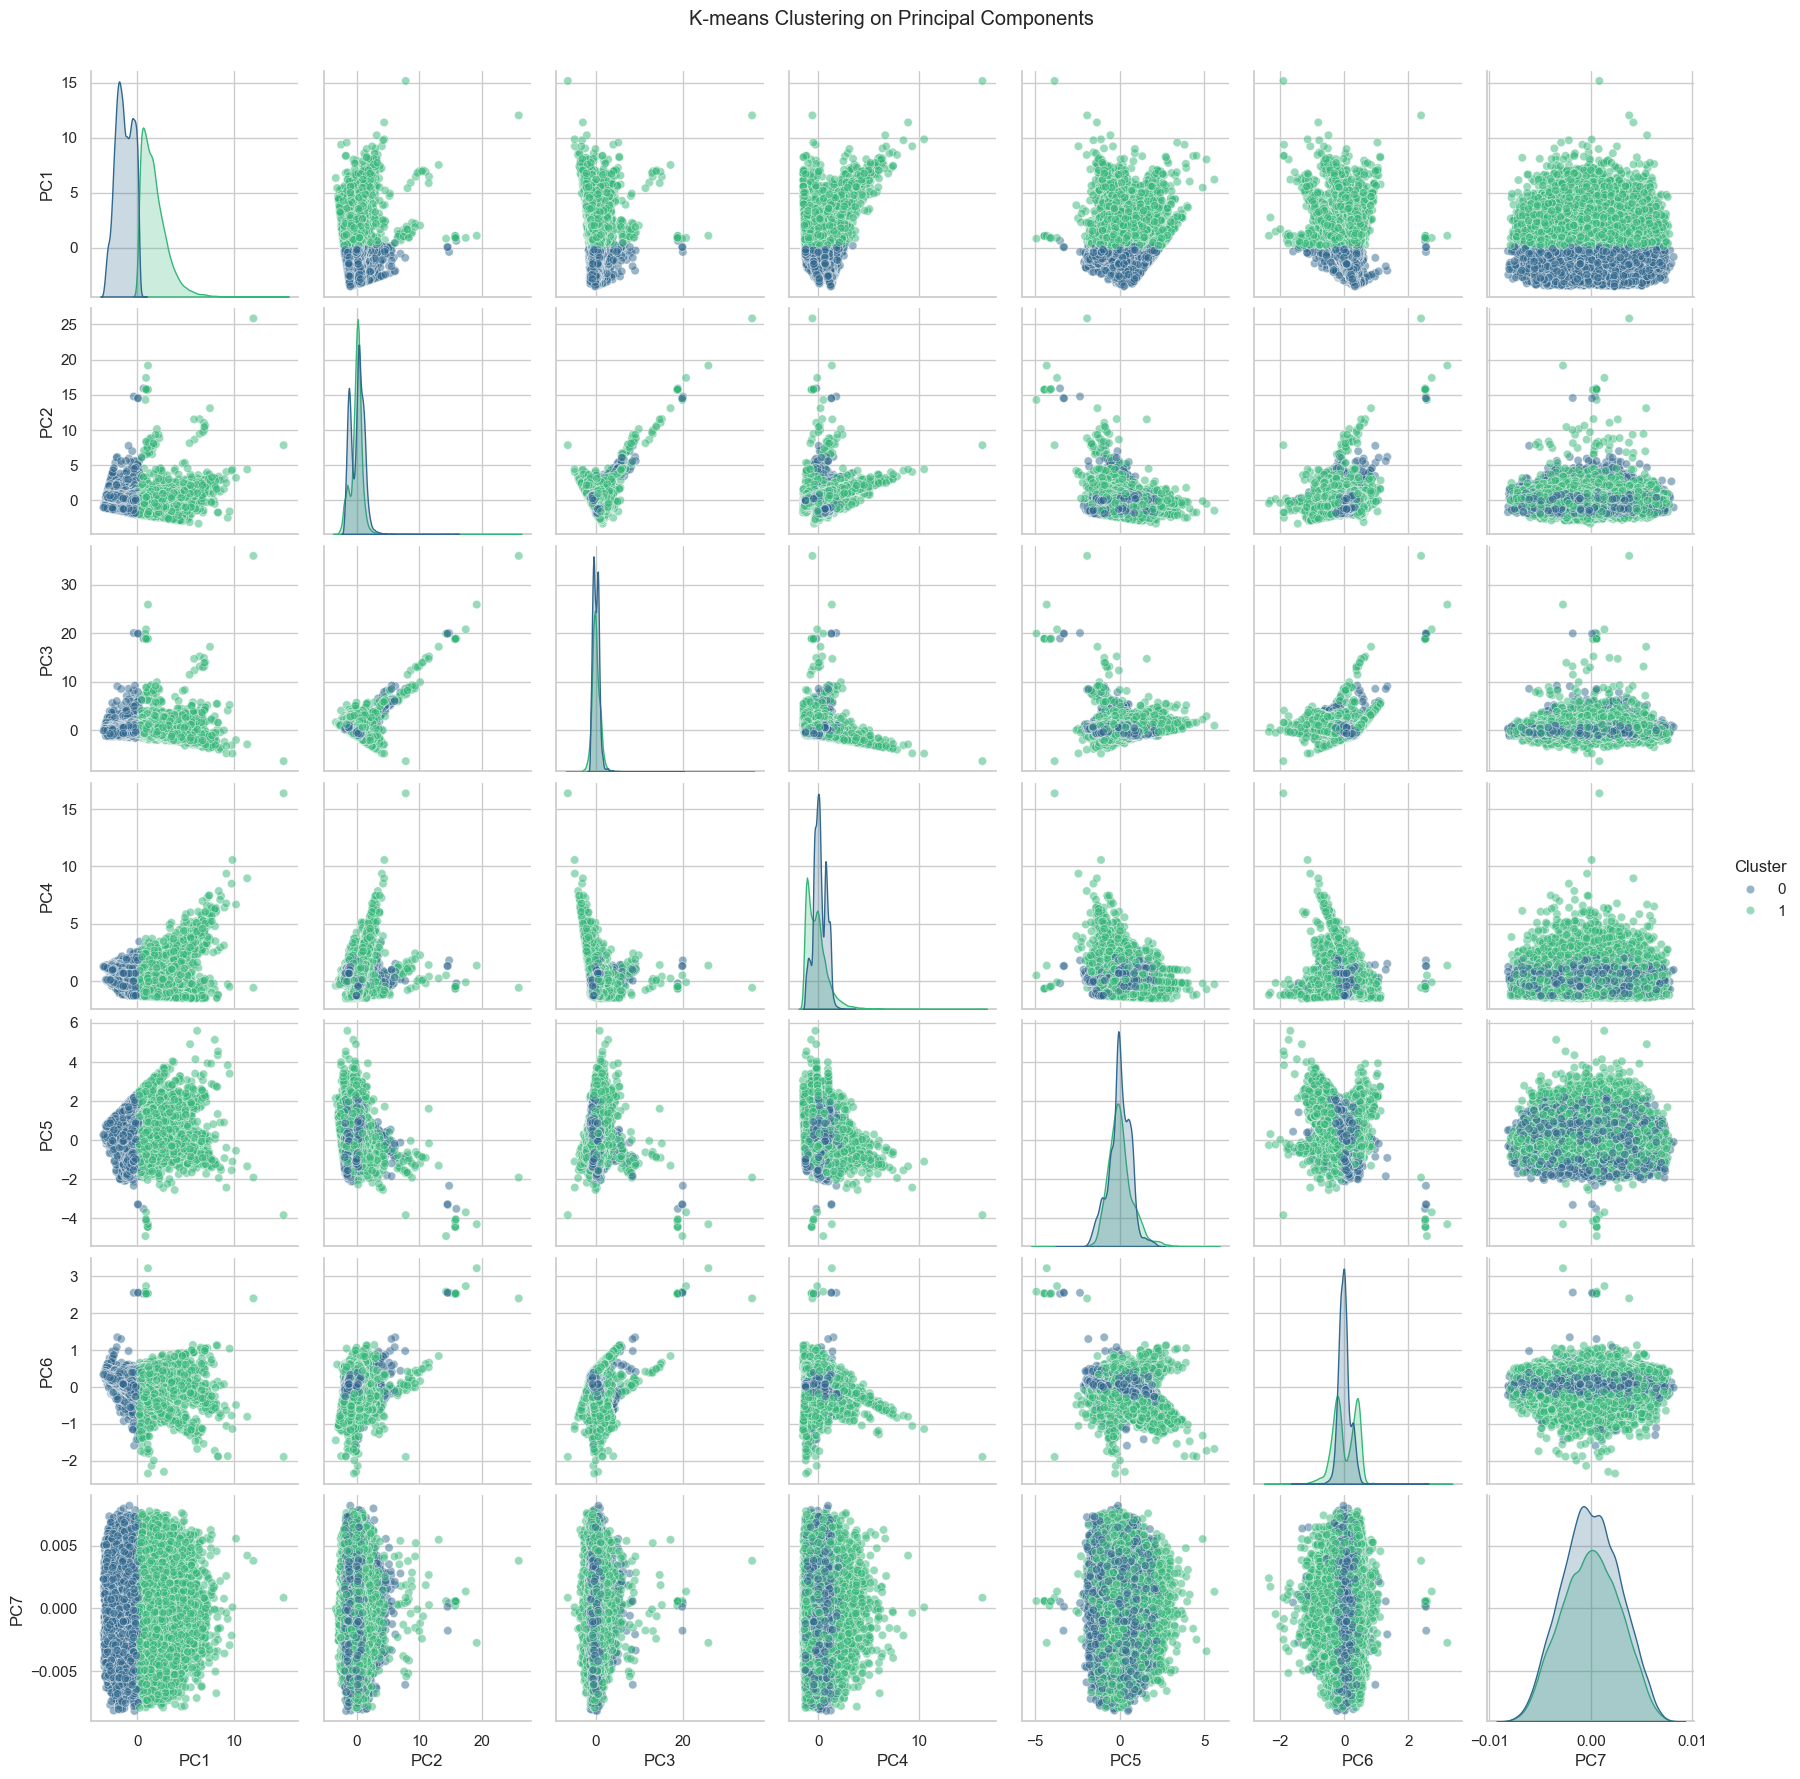

In [38]:
warnings.simplefilter(action='ignore')
df_transformed = pd.DataFrame(transformed_data, columns=[f"PC{i+1}" for i in range(transformed_data.shape[1])])

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(transformed_data)

df_transformed['Cluster'] = clusters

sns.pairplot(df_transformed, hue='Cluster', palette='viridis', plot_kws={'alpha':0.5})
plt.suptitle('K-means Clustering on Principal Components', y=1.02)
plt.show()


<div class="alert alert-block alert-warning">
The plot distinctly reveals the presence of two clusters, both characterized by dense populations; however, it is noteworthy that the cluster represented in green appears notably larger than the one depicted in blue.

In [39]:
transformed_data = pca.transform(df_sc)[:, :3]  # Keep only the first two components
transformed_data

array([[-2.58052398, -1.07570517,  0.18918296],
       [-1.76323976,  0.69990682,  2.61599103],
       [-0.57971415,  1.82896501,  1.64054504],
       ...,
       [ 1.17806656, -1.63801535,  1.18983285],
       [-1.47379502,  0.2301417 , -0.72604856],
       [ 2.64064866,  0.93805982,  0.55922316]])

<div class="alert alert-block alert-warning">
<b>Conclusion: </b> High covariance between features (e.g Regular pay, Total pay and Regular pay (90), Retirement pay, total pay (92%), overtime pay(66%) suggests that there is a strong linear relationship between those features. In such situations where, conducting Principal Component Analysis (PCA) can be beneficial for several reasons:

* By transforming the original features into a new set of uncorrelated variables (principal components), PCA allows us to retain most of the variability in the data while reducing the number of features.
* PCA transforms the original features into principal components that are uncorrelated. This can be advantageous when dealing with multicollinearity or when the original features are highly correlated as in case of Regular pay and Total pay.

<div class="alert alert-block alert-success">
<b>Kmeans:</b> Given the presence of clusters with shapes that are not immediately apparent or intuitive, the K-means algorithm is applied for its ability to handle a variety of cluster structures.


Considering the reduced dimensionality:

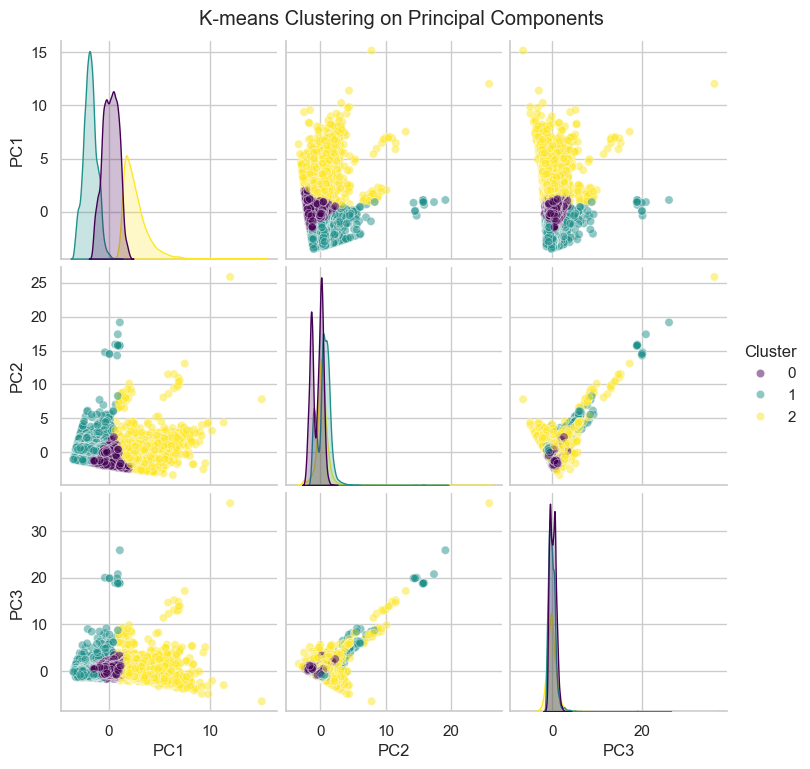

In [40]:

df_transformed = pd.DataFrame(transformed_data, columns=[f"PC{i+1}" for i in range(transformed_data.shape[1])])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(transformed_data)

df_transformed['Cluster'] = clusters

sns.pairplot(df_transformed, hue='Cluster', palette='viridis', plot_kws={'alpha':0.5})
plt.suptitle('K-means Clustering on Principal Components', y=1.02)
plt.show()


In order to choose the most optimal number of clusters the elbow graph is presented: 

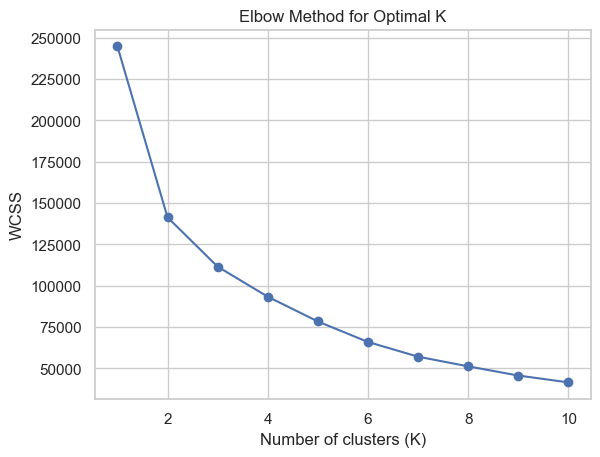

In [ ]:
wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(transformed_data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


Although the Elbow offers 2 clusters 3 is chosen as it might align better to the problem requrements to identify different labour force clusters.

In [ ]:
# Assuming transformed_data contains the PCA-transformed data and clusters is the resulting cluster labels
silhouette_avg = silhouette_score(transformed_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.3254093683403228


<div class="alert alert-block alert-warning">
Although the Silhouette score is approximately 0.33, it can be reasonable enough to assure the presence of three different clusters.

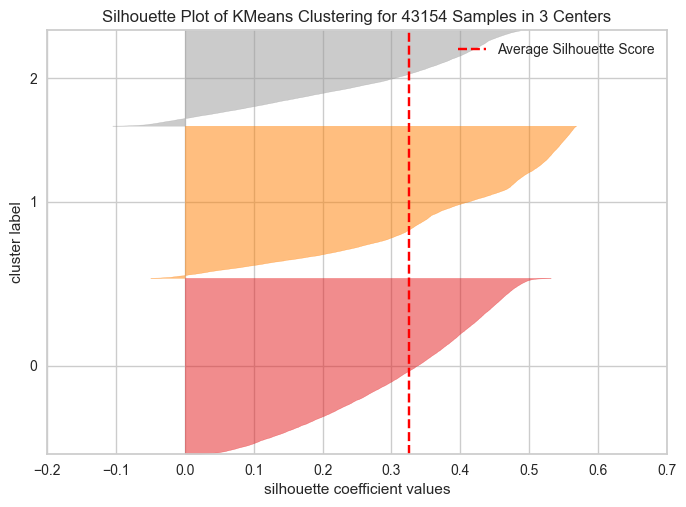

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 43154 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
warnings.simplefilter(action='ignore')

kmeans = KMeans(n_clusters=3, random_state=0)

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(transformed_data)

visualizer.poof()

Small portion of the silhouette scores are negative while the Major three are positive, it suggests that the clustering is generally effective, but there are some data points that may not be well-matched with their assigned clusters.

<div class="alert alert-block alert-success">
<b>DBSCAN:</b> Recognizing the existence of clusters with intricate and non-uniform shapes that may not be readily discernible, the DBSCAN algorithm is selected. DBSCAN is well-suited for identifying clusters of varying shapes and densities, making it a suitable choice when the structure of the data is not known in advance. Its ability to detect clusters based on density rather than assuming spherical shapes makes it a valuable approach for revealing complex patterns in the data.


Before conducting DBSCAN, the OPTICS algorithm is employed, and it generates a reachability plot—a visualization illustrating the clustering structure based on reachability distances between data points. The examination of this plot allows us to discern insights into the density structure of the data, facilitating the identification of potential natural clusters within the dataset.

In [47]:
optics = OPTICS(min_samples=15, xi=0.05, min_cluster_size=0.05)
optics.fit(df_sc)

OPTICS(min_cluster_size=0.05, min_samples=15)

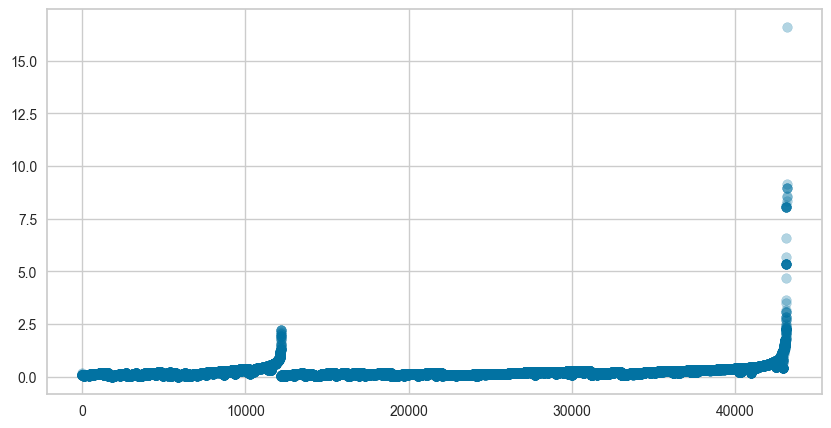

In [48]:
space = np.arange(len(df_sc))
reachability = optics.reachability_[optics.ordering_]

plt.figure(figsize=(10, 5))
plt.scatter(space, reachability, alpha=0.3)

Analyzing the reachability plot under the selected parameters reveals the presence of two distinct clusters, as evidenced by an observed decline in reachability values within the central region of the graph, it also aids in defining the appropriate epsilon value.

In [49]:
Version_xi=optics.labels_

Version_1 = cluster_optics_dbscan(
    reachability=optics.reachability_,
    core_distances=optics.core_distances_,
    ordering=optics.ordering_,
    eps=1,
)
Version_2 = cluster_optics_dbscan(
    reachability=optics.reachability_,
    core_distances=optics.core_distances_,
    ordering=optics.ordering_,
    eps=2,
)

In [50]:
np.unique(Version_xi), np.unique(Version_1), np.unique(Version_2)

(array([-1,  0,  1]), array([-1,  0,  1,  2]), array([-1,  0,  1]))

Based on an intuitive visual examination of the reachability plot, a selection of the epsilon parameter is made with the expectation that it will yield two distinct clusters. This decision is grounded in the observed structural patterns in the data, as revealed by the reachability plot, and aligns with the anticipation that the specified epsilon value will effectively delineate the identified clusters within the dataset.

In [53]:
dbscan=DBSCAN(eps=2, min_samples=15, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=3)

dbscan_clusters=dbscan.fit_predict(df_sc)

print(np.unique(dbscan_clusters)) 

[-1  0  1]


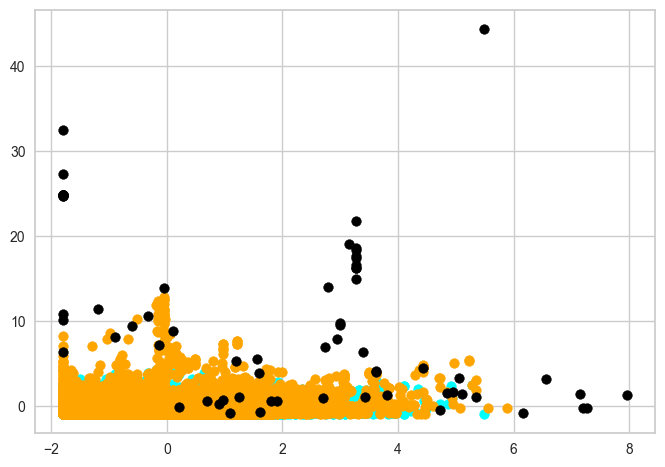

In [54]:
colors=['cyan', 'orange', 'lime', 'gold']
def plot_clusters(df_sc, clusters):
    for cluster in np.unique(clusters):
        if cluster != -1:
            X_cluster = df_sc.loc[clusters == cluster, :]
            plt.scatter(X_cluster.iloc[:, 0], X_cluster.iloc[:, 2], c=colors[cluster])

    X_noise = df_sc.loc[clusters == -1, :]
    plt.scatter(X_noise.iloc[:, 0], X_noise.iloc[:, 2], c='black')

plot_clusters(df_sc, dbscan_clusters)


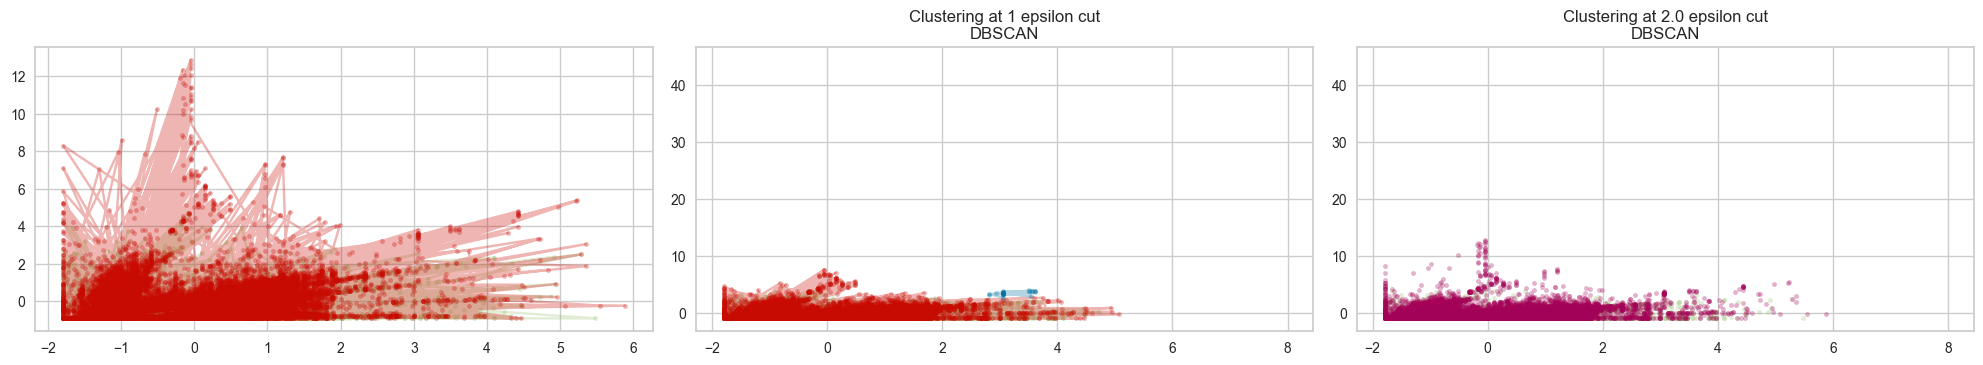

In [55]:
plt.figure(figsize=(20, 10))
G = gridspec.GridSpec(3, 3)
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])


# OPTICS
colors = ["g", "r", "b", "c"]
for klass, color in zip(range(0, 4), colors):
    Xk = df_sc[Version_xi == klass]
    ax2.plot(Xk['REGULAR_PAY'], Xk['ALL_OTHER_PAY'], color, alpha=0.3, marker=".")

ax3.plot(df_sc[Version_xi == -1]['REGULAR_PAY'], df_sc[Version_xi == -1]['ALL_OTHER_PAY'], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# Clustering at 1 epsilon cut DBSCAN
colors = ["g", "r", "b", "c"]
for klass, color in zip(range(0, 4), colors):
    Xk = df_sc[Version_1 == klass]
    ax3.plot(Xk['REGULAR_PAY'], Xk['ALL_OTHER_PAY'], color, alpha=0.3, marker=".")

ax3.plot(df_sc[Version_1 == -1]['REGULAR_PAY'], df_sc[Version_1 == -1]['ALL_OTHER_PAY'], "k+", alpha=0.1)
ax3.set_title("Clustering at 1 epsilon cut\nDBSCAN")

# Clustering at 2.0 epsilon cut DBSCAN
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = df_sc[Version_2 == klass]
    ax4.plot(Xk['REGULAR_PAY'], Xk['ALL_OTHER_PAY'], color, alpha=0.3)

ax4.plot(df_sc[Version_2 == -1]['REGULAR_PAY'], df_sc[Version_2 == -1]['ALL_OTHER_PAY'], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()


In the obtained clustering results, few distinct clusters are discerned. However, the presentation of K-means appears more perceptible for the end user compared to DBSCAN as it lets us identify 3 distinct clusters and make assumptions based on it, while DBSCAN clustering can provide us with only two undistinguishable clusters. In the case of DBSCAN, the two clusters overlap, indicating a high density, which may result in a visual merging of the clusters. Conversely, K-means distinctly separates the three clusters, enabling clearer interpretation as three discernible groups of employees. Despite their proximity, the distinctiveness in the K-means representation enhances user interpretability.

In terms of the identified clusters, the relatively compact distribution of data points and the proximity of the three clusters (23%/36%,41%) suggest a potentially equitable distribution of income among individuals working in major city occupations. However, relying on the loadings table, presumably from the origial features these four contributes the most to the 3 principal components:"total pay", "all other pay", "Gender" and "City retirements contributions". Hence we can assume that most dense cluster #0(purple) can be group of employees with relatively higher income, then follows the cluster #1(green) which is almost the same size as the largest #2(yellow) cluster, however the Yellow one is more spread over the plot leading us to condiser that as the most unequally distributed group with different types of payroll. The participation of gender might also aid the effect on such grouping.

 the observed differences in density between the clusters imply distinct characteristics within each.
The more densely populated cluster might indicate a group of individuals occupying possibly higher positions within their respective departments, contributing to a relatively higher overall payroll. Conversely, the larger and somewhat more dispersed cluster hints at a diversity of payroll, suggesting a broader range of positions and income levels within this group.
This nuanced interpretation provides insights into the potential income distribution structures among employees in major city occupations, offering valuable information for further analysis and decision-making processes.

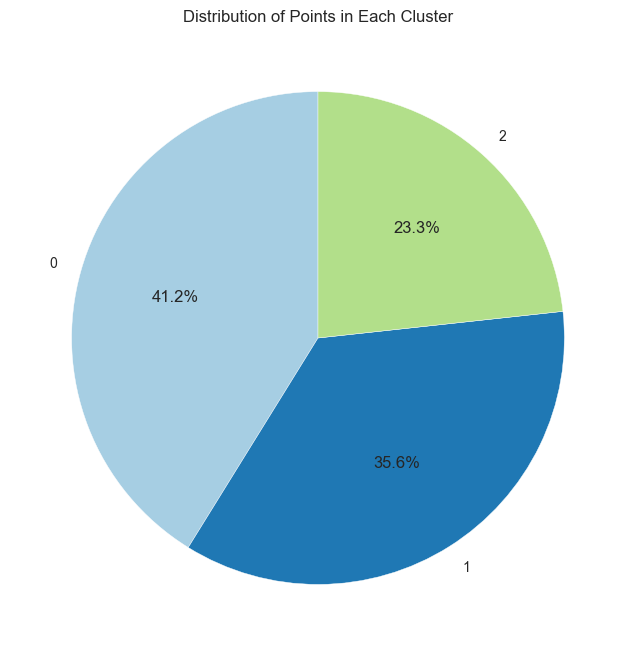

In [56]:
df_transformed = pd.DataFrame(transformed_data, columns=[f"PC{i+1}" for i in range(transformed_data.shape[1])])
df_transformed['Cluster'] = clusters

# Count the number of points in each cluster
cluster_counts = df_transformed['Cluster'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(cluster_counts))))
plt.title('Distribution of Points in Each Cluster')
plt.show()


In conclusion, the application of K-means clustering has proven to be more conducive to uncovering and comprehending hidden patterns within the dataset, offering a clearer and more interpretable representation. In contrast, the utilization of DBSCAN has presented challenges in terms of interpretation, particularly due to the intricacies introduced by overlapping clusters.



<b>Summary and Interpretation:</b>
The K-means clustering analysis resulted in the identification of three closely located clusters. Cluster analysis revealed one smaller but denser cluster and anothers slightly larger. This clustering pattern suggests a distinct segmentation among employees, with one group being more concentrated and potentially exhibiting similar characteristics or behaviors compared to the others.

<b>Comparison to the Original Plan:</b>
The original plan to outlined the intention to and uncover patterns and structure within the employee dataset is conducted. The emergence of three closely located clusters aligns with this objective, providing a segmentation that may not have been immediately apparent in the raw data.

<b>Generated Value:</b>
The final clustering provides valuable insights into the underlying structure of the workforce. It helps the organization by highlighting inherent differences or similarities among employees. This knowledge is crucial for targeted decision-making, resource allocation, and the development of tailored strategies for each cluster.

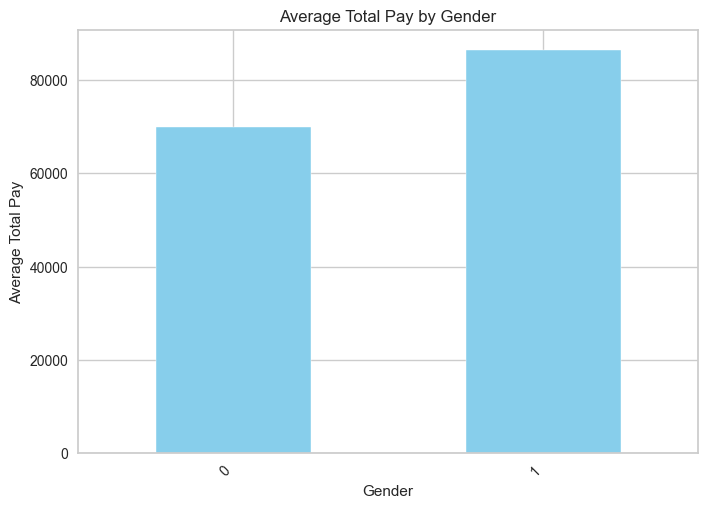

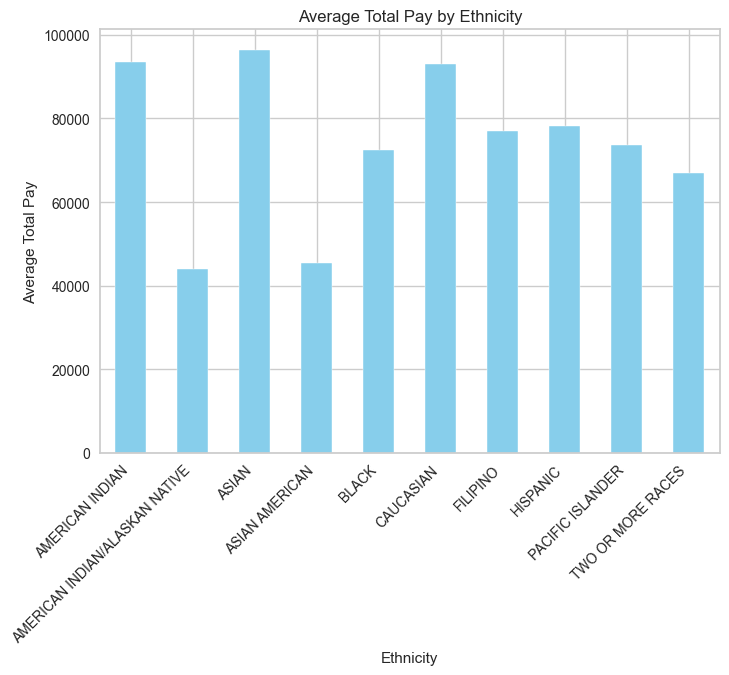

In [57]:

def plot_average_pay(data, group_by_column, plot_title, x_label, y_label):
    y = data.reset_index()
    average_pay = y.groupby(group_by_column)['TOTAL_PAY'].mean()
    
    average_pay.plot(kind='bar', color='skyblue')
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45, ha='right') 
    plt.show()

plot_average_pay(df, 'GENDER', 'Average Total Pay by Gender', 'Gender', 'Average Total Pay')
plot_average_pay(df, 'ETHNICITY', 'Average Total Pay by Ethnicity', 'Ethnicity', 'Average Total Pay')


A detailed examination of payroll distribution by gender and ethnicity might reveal and explain the differences between clusters. To gain a clearer understanding, it is advisable to extend the analysis to historical data as well, in order to identify whether the changes in labour market causes such clustering pattern or other aspects like Gender and Ethnicity play a key role. This step is crucial as it allows for the consideration of temporal variations, potentially influenced by changes in labor policies and organizational strategies over the years. Examining historical data not only provides context to observed disparities but also ensures a more accurate interpretation of cluster silhouettes. This approach is essential for making informed decisions on workforce management and policy development, taking into account the evolving dynamics of the organization over time.